# Laboratorio 7
## Clasificación de Malware
Clasificación de malware con identificación de imágenes (TF & Keras)
> #### Gerardo Méndez 18239
> #### María José Castro 181202

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.constraints import maxnorm

### PARTE 1
Carga de Imágenes & Preprocesamiento

#### Carga de datasets

In [49]:
batch_size = 32
img_height = 128
img_width = 128

In [50]:
DATA_DIRECTORY = 'data/images'

In [51]:
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.


In [52]:
class_names = dataset.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


#### Class distribution

In [13]:
import collections

def get_class_distribution(dataset):
    class_distribution = {}
    for element in dataset.as_numpy_iterator():
        label = element[1][0]

        try:
            class_distribution[label] += 1
        except:
            class_distribution[label] = 0

    class_distribution = collections.OrderedDict(sorted(class_distribution.items())) 
    return class_distribution

In [14]:
class_distribution = get_class_distribution(dataset)

In [15]:
for i in range(len(class_names)):
    name = class_names[i]
    dist = class_distribution[i]
    print(name, " " * (15 - len(name)), dist)

Adialer.C        121
Agent.FYI        115
Allaple.A        2948
Allaple.L        1590
Alueron.gen!J    197
Autorun.K        105
C2LOP.P          145
C2LOP.gen!g      199
Dialplatform.B   176
Dontovo.A        161
Fakerean         380
Instantaccess    430
Lolyda.AA1       212
Lolyda.AA2       183
Lolyda.AA3       122
Lolyda.AT        158
Malex.gen!J      135
Obfuscator.AD    141
Rbot!gen         157
Skintrim.N       79
Swizzor.gen!E    127
Swizzor.gen!I    131
VB.AT            407
Wintrim.BX       96
Yuner.A          799


### PARTE 2
Plot de Imágenes

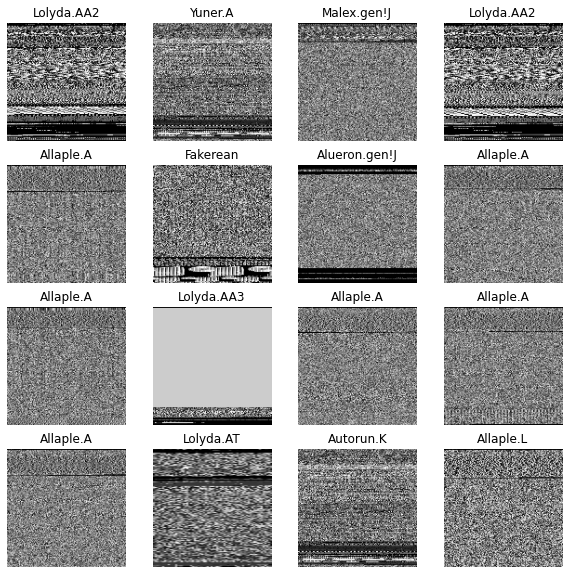

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### PARTE 3
Construcción de Red Neuronal (CNN)

In [54]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

### PARTE 4
Resumen del modelo

In [63]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy', 'MeanSquaredError']
)

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1016064)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                65028160  
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1625      
Total params: 65,049,177
Trainable params: 65,049,177
Non-trainable params: 0
_________________________________________________________________


### PARTE 5
División de los datos

In [57]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.
Using 6538 files for training.


In [58]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.
Using 2801 files for validation.


### PARTE 6
Entrenamiento de modelos

In [33]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
205/205 [==============================] - 228s 1s/step - loss: 305.0184 - accuracy: 0.8391
Epoch 2/10
205/205 [==============================] - 217s 1s/step - loss: 0.0797 - accuracy: 0.9804
Epoch 3/10
205/205 [==============================] - 213s 1s/step - loss: 0.0121 - accuracy: 0.9972
Epoch 4/10
205/205 [==============================] - 328s 2s/step - loss: 0.0048 - accuracy: 0.9992
Epoch 5/10
205/205 [==============================] - 226s 1s/step - loss: 0.0028 - accuracy: 0.9995
Epoch 6/10
205/205 [==============================] - 212s 1s/step - loss: 0.0056 - accuracy: 0.9986
Epoch 7/10
205/205 [==============================] - 212s 1s/step - loss: 0.0137 - accuracy: 0.9994
Epoch 8/10
205/205 [==============================] - 212s 1s/step - loss: 2.4239e-05 - accuracy: 1.0000
Epoch 9/10
205/205 [==============================] - 211s 1s/step - loss: 9.4866e-06 - accuracy: 1.0000
Epoch 10/10
205/205 [==============================] - 227s 1s/step - loss: 6.363

In [35]:
score = model.evaluate(test_dataset, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.2273997813463211 / Test accuracy: 0.9710817337036133


In [65]:
model.fit(train_dataset, epochs=5)

Epoch 1/5
205/205 [==============================] - 236s 1s/step - loss: 287.2350 - Accuracy: 0.8552 - mean_squared_error: 134.3044
Epoch 2/5
205/205 [==============================] - 218s 1s/step - loss: 0.0500 - Accuracy: 0.9890 - mean_squared_error: 134.3089
Epoch 3/5
205/205 [==============================] - 218s 1s/step - loss: 0.0137 - Accuracy: 0.9976 - mean_squared_error: 134.3096
Epoch 4/5
205/205 [==============================] - 226s 1s/step - loss: 0.0062 - Accuracy: 0.9988 - mean_squared_error: 134.3096
Epoch 5/5
205/205 [==============================] - 229s 1s/step - loss: 0.0022 - Accuracy: 0.9995 - mean_squared_error: 134.3097


In [66]:
model.metrics_names

['loss', 'Accuracy', 'mean_squared_error']

In [68]:
score = model.evaluate(test_dataset, verbose=0)

In [69]:
print(f'Loss: {score[0]} / Accuracy: {score[1]} / Mean Squared Error: {score[2]}')

Loss: 0.2498692125082016 / Accuracy: 0.9614423513412476 / Mean Squared Error: 133.62010192871094


### Parte 7
Discusión de resultados

> Podemos observar que el modelo tiene un buen desempeño aún luego de la evaluación y prueba con datos. El accuracy fue de 96%, y nos da un resultado alentador sobre el performance del modelo, y la capacidad que tiene para clasificar malware. 